# Final exam DSE 200

Your task in this take-home exam is to analyze the evolution of poverty and income distribution in the United States.

### Data source: 

Use U.S. Census Bureauâ€™s data. Find the relavant URLs for getting Census data for poverty and income from 1993 to 2016 (both years included)

(hint : go through this link : https://www.census.gov/data/datasets/2017/demo/saipe/2017-state-and-county.html for 2017 data and try to figure out the dataset URLs for remaining years)  


Use the given code snippet to access the data files

Extract the data corresponding to years [1993-2016]  
Extract the required fields. The required fields are: 
   'State FIPS', 'County FIPS','Poverty Estimate All Ages', 'Poverty Percent All Ages', 
   'Poverty Estimate Under Age 18', 'Poverty Percent Under Age 18', 'Poverty Estimate Ages 5-17', 
   'Poverty Percent Ages 5-17', 'Median Household Income','Name','Postal'
 
### Pandas Data-Frames

1)
    - create a data frame with just the country-wide data
    - create a data frame with just the data of the states
    - create a data frame with just the data of the counties

    
2) Plot a graph of 'Poverty Percent All Ages' of the entire country vs year (line graph).
   Plot a graph of 'Median Household Income' of the entire country vs year (line graph)

3) Plot the total poverty in each state across the years and compare it with the country-wide poverty

4) Plot county-wide poverty stats

- Create a dataframe with the Unique FIPS code (obtained by combining the state and county FIPS), 'Poverty Percent All Ages' in every county in 2000, 'Poverty Percent All Ages' in every county in 2016 and the change ratio between 2000 and 2016. (change ratio = poverty % in 2016 / poverty % in 2000. Divide this by the nationwide change ratio for normalization. A value > 1 indicates that poverty is higher compared to the nation-wide poverty and a value < 1 indicates that poverty is lower compared to the nationwide poverty.)


FIPS code is a unique code to identify counties and states in the US. In this data you have been given state code and county code separately. You will have to combine the state code and the county code to generate a unique code for each place, which will be used to plot on the map. Please note that before combining, make sure the state code is 2 digits and county code is 3 digits by adding zeroes to the front.


- Plot the 'Poverty Percent All Ages' for each county on the map for the years 1995 and 2016.
- Plot the normalized change ratio on the map.
- Find the counties which witnessed the most positive and most negative change in poverty,

For this visualization, we will use a library called Vincent, which lets you plot data for places using their FIPS code instead of using latitude/longitude. 

To install vincent do
`pip install vincent` or `conda install vincent`


To use it in the notebook and display the maps inside the notebook do

`import vincent`

`vincent.core.initialize_notebook()`

You can find further details about how to use it here - http://wrobstory.github.io/2013/10/mapping-data-python.html and https://github.com/wrobstory/vincent

Before closing your notebook, please clear the output of the vincent maps as it becomes difficult of reload the notebook later. For plotting the counties on the map, you will need to use the file us_counties.topo.json present in the exam folder.

Tips: -  
    Check the type of datafields before operating on them. It will also help you debug for errors.
    Clean the data before using it. Drop those rows before using them.

In [ ]:
import urllib

urls = [] # Add required URLs here

def getUrl(urls):
    for url in urls:
        response = urllib.request.urlopen(url)
        lines = response.read().split('\n')
        # del lines[-1]
        #TODO -code to use the text data
       
        
getUrl(urls)

### Q1: Create the dataframes

Download and parse the data files and create the following three pandas dataframes: (your dataframes should have data in the format shown below)

 * US_stat: statistics for the whole United States.
 * states_stat: Statistics for each state.
 * county_stat: Statistics for each county.

In [ ]:
# Dataframes should look like this

In [7]:
US_stat.head()

State FIPS County FIPS   FIPS Poverty Estimate All Ages  \
year                                                           
1993         00         000  00000                  39264811   
1995         00         000  00000                  36424609   
1997         00         000  00000                  35573858   
1998         00         000  00000                  34475762   
1999         00         000  00000                  32791272   

     Poverty Percent All Ages Poverty Estimate Under Age 18  \
year                                                          
1993                     15.1                      15727492   
1995                     13.8                      14665019   
1997                     13.3                      14113067   
1998                     12.7                      13466544   
1999                     11.9                      12280321   

     Poverty Percent Under Age 18 Poverty Estimate Ages 5-17  \
year                                                           
1993                         22.7                    9814133   
1995                         20.8                    9306018   
1997                         19.9                    9306705   
1998                         18.9                    8922935   
1999                         17.1                    8188068   

     Poverty Percent Ages 5-17 Median Household Income           Name Postal  \
year                                                                           
1993                      20.4                   31241  United States     US   
1995                      18.7                   34076  United States     US   
1997                      18.4                   37005  United States     US   
1998                      17.5                   38885  United States     US   
1999                      15.9                   40696  United States     US   

      year  
year        
1993  1993  
1995  1995  
1997  1997  
1998  1998  
1999  1999

In [8]:
states_stat.head()

State FIPS County FIPS   FIPS Poverty Estimate All Ages  \
Postal year                                                           
AK     1993         02         000  02000                     67099   
       1995         02         000  02000                     60735   
       1997         02         000  02000                     68409   
       1998         02         000  02000                     65970   
       1999         02         000  02000                     53963   

            Poverty Percent All Ages Poverty Estimate Under Age 18  \
Postal year                                                          
AK     1993                     11.2                         30628   
       1995                     10.1                         25270   
       1997                     11.2                         31968   
       1998                     10.8                         28014   
       1999                      8.8                         21176   

            Poverty Percent Under Age 18 Poverty Estimate Ages 5-17  \
Postal year                                                           
AK     1993                         15.9                      17496   
       1995                         13.2                      15234   
       1997                         16.2                      21786   
       1998                         14.6                      19387   
       1999                         11.2                      14137   

            Poverty Percent Ages 5-17 Median Household Income    Name  
Postal year                                                            
AK     1993                      13.3                   39431  Alaska  
       1995                      11.2                   42255  Alaska  
       1997                      15.1                   43657  Alaska  
       1998                      13.6                   47177  Alaska  
       1999                      10.1                   49133  Alaska

In [9]:
county_stat.head()

State FIPS County FIPS Poverty Estimate All Ages  \
Postal FIPS  year                                                    
AK     02013 1993         02         013                       224   
             1995         02         013                       242   
             1997         02         013                       322   
             1998         02         013                       265   
             1999         02         013                       240   

                  Poverty Percent All Ages Poverty Estimate Under Age 18  \
Postal FIPS  year                                                          
AK     02013 1993                      9.7                            64   
             1995                     10.3                            72   
             1997                     14.2                           125   
             1998                     12.1                            85   
             1999                      8.9                            46   

                  Poverty Percent Under Age 18 Poverty Estimate Ages 5-17  \
Postal FIPS  year                                                           
AK     02013 1993                         11.0                         36   
             1995                         11.3                         44   
             1997                         20.8                         89   
             1998                         15.1                         72   
             1999                         10.0                         27   

                  Poverty Percent Ages 5-17 Median Household Income  \
Postal FIPS  year                                                     
AK     02013 1993                       9.1                   46829   
             1995                      10.0                   46173   
             1997                      20.4                   42714   
             1998                      17.3                   40350   
             1999                       8.0                   39386   

                                     Name  
Postal FIPS  year                          
AK     02013 1993  Aleutians East Borough  
             1995  Aleutians East Borough  
             1997  Aleutians East Borough  
             1998  Aleutians East Borough  
             1999  Aleutians East Borough

In [10]:
import matplotlib.pyplot as plt

### Q2. Plot the US-wide statistics on poverty.

Plot the 'Poverty Percent All Ages' and 'Median Household Income' across entire US over the years. 

Compute the percentage of increase in poverty in the US between 2000 and 2016. - [poverty % in 2016] / [poverty % in 2000]

poverty percent change ratio from 2000 to 2013 = 1.3982300885


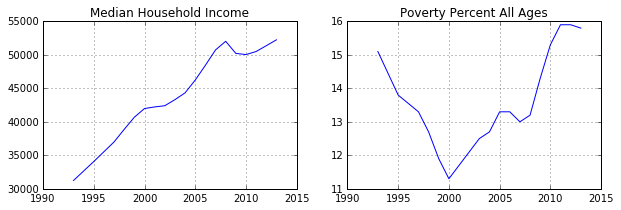

In [11]:
# Do not run this cell
# If you do analysis for 2000-2013, Answer looks like some thing below

### 2000 was a good year

We see from these graphs that even though the median household in the US keeps increasing at a more or less constant rate, the pocerty levels reached a minimum at 2000 and have increased dramatically , by 40% since then.

We will now attempt to identify the geographic distribution of the rise in poverty since 2000.

We start by plotting the time evolution of poverty for each of the states.

### Q3: Plot the change in poverty percentages by state.

For each state, plot the poverty levels across time and compare it with the nation-wide poverty level. Produce a graph similar to the ones below.

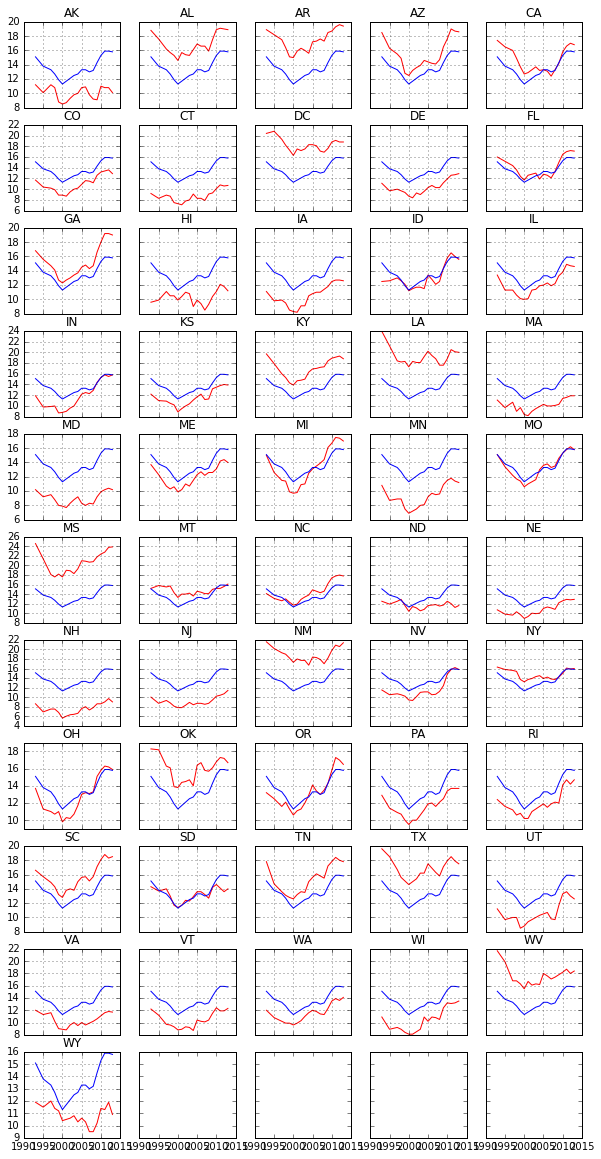

In [13]:
# Do not run this cell
# If you do analysis for 2000-2013, Answer looks like some thing below

### Q4: plot poverty statistics by county

Using the vincent library and the dataframe `county_stat`, generate the following three maps.

1. Overall percentage of poverty for each county in 2000.
![poverty2000](Poverty2000.jpg)
1. Overall percentage of poverty for each county in 2016.

1. Ratio between percentage of change in poverty from 2000 to 2016 for each county. Divided by the nation-wide change in poverty (find this value).

### Q5: Identify the extremes.
Find out which are the counties in which the poverty percentage increased or decreased the most during the period 2000 - 2016.

In [21]:
# Do not run this cell
# If you do analysis for 2000-2013, Answer looks like some thing below

County with max increase in poverty --  Story County in state  IA
change= 1.85120196526
County with max decrease in poverty --  Billings County in state  ND
change= 0.427484099677
